# Objectives
YWBAT
* use the central limit theorem to find parameters of a population 
* measure skewness and kurtosis
* define and use bootstrap sampling in tandem with the CLT

# Questions
:(

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

# let's load in the iris dataset into a dataframe

In [4]:
iris = load_iris()

In [5]:
data = iris.data
target = iris.target
colnames = iris.feature_names
targetNames = iris.target_names

In [6]:
df = pd.DataFrame(data, columns=colnames)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
targetNames

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df['target'] = target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df['target_names'] = [targetNames[i] for i in df.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df.target_names.value_counts()

setosa        50
virginica     50
versicolor    50
Name: target_names, dtype: int64

In [11]:
# Measuring the mean of sepal lengths on all setosa iris flowers

In [14]:
# step 1: get the data for sepal length for setosas from df
# step 2: I need to take 30 sampling distributions from my 'population of 50'
# step 3: I need to take the mean of each distribution
# step 4: calculate the standard deviation of my sampling distribution

In [24]:
setosa_sepal_length = df.loc[df['target_names']=='setosa', 'sepal length (cm)']
setosa_sepal_length.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

In [31]:
# let's take one bootstrap sample and compare it to the population of 50

In [21]:
# a bootstrap sample B from a population P of size N is
# a sample that contains N items from my population 
# where items can be selected more than once

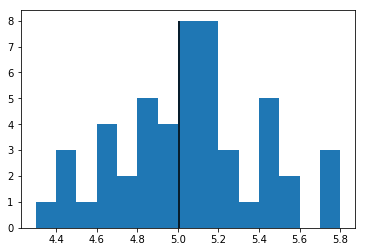

In [29]:
plt.hist(setosa_sepal_length, bins=15)
mu = setosa_sepal_length.mean()
plt.vlines(mu, ymin=0, ymax=8)
plt.show()

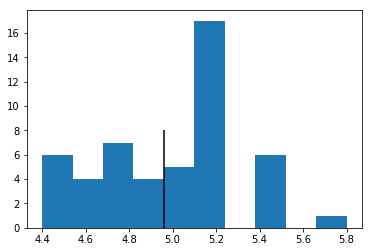

In [30]:
bootstrap1 = np.random.choice(setosa_sepal_length, size=50)
plt.hist(bootstrap1)
mu = bootstrap1.mean()
plt.vlines(mu, ymin=0, ymax=8)
plt.show()

In [97]:
# step 2: I need to take 30 sampling distributions from my 'population of 50'
samples = []
for i in range(30):
    sample = np.random.choice(setosa_sepal_length, size=50)
    samples.append(sample)

In [98]:
# step 3: I need to take the mean of each distribution
mus = [np.mean(sample) for sample in samples]
print(mus)

[4.989999999999999, 4.946000000000001, 5.086, 5.01, 4.94, 4.992, 4.99, 5.028, 5.013999999999999, 4.95, 4.976, 5.08, 5.013999999999999, 5.087999999999999, 5.002000000000001, 5.01, 5.024, 4.898, 4.976, 5.06, 4.974, 4.928, 5.016000000000001, 4.9959999999999996, 4.948, 5.12, 5.026, 5.01, 5.02, 4.994]


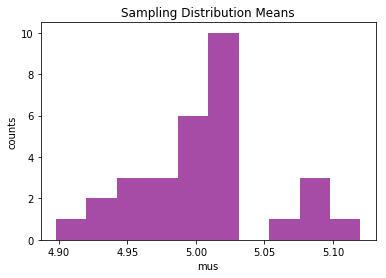

In [99]:
plt.hist(mus, color='purple', alpha=0.7)
plt.title("Sampling Distribution Means")
plt.xlabel("mus")
plt.ylabel("counts")
plt.show()

In [100]:
# step 4: calculate the standard deviation of my sampling distribution
mu = np.mean(mus)
mu_std = setosa_sepal_length.std()/np.sqrt(30)

In [101]:
mu_std

0.0643555176582492

In [102]:
versicolor_sepal_length = df.loc[df.target==1, 'sepal length (cm)']

In [103]:
versicolor_sample = np.random.choice(versicolor_sepal_length, size=40)
versicolor_sample_mu = versicolor_sample.mean()
versicolor_sample_mu

5.8625

In [104]:
# zscore of the versicolor mean to the mus of the setosa
(5.965 - np.mean(mus))/mu_std

14.939925924804104

In [105]:
scs.norm(mu, mu_std).cdf(4.975)

0.328748911425774

In [106]:
# testing the probability of having a mean of 5.965
scs.norm(mu, mu_std).pdf(5.965)

2.1123165057931664e-48

# test the skewness and kurtosis of our mus

In [107]:
scs.skew(mus)

0.27251628764285785

In [108]:
scs.kurtosis(mus)

0.06659834885857485

In [109]:
# the actual way to measure normality
# shapiro-wilk test

In [110]:
scs.shapiro(mus)

(0.9690538644790649, 0.5136221647262573)

# What did we learn?
* actual way to measure normality using a shapir-wilk test
* bootstrap sampling
* why the clt is important to making data normal and using that to predict classes